## Heart Disease Analysis

**Hungarian Heart Disease Dataset**

The dataset used for this analysis is the "Hungarian Heart Disease Dataset" extracted from Hungarian Institute of Cardiology, and written by Andras Janosi, M.D.. This database measures 14 different attributes: age, sex, chest pain type (cp), resting blood pressure (trestbps), serum cholestoral (chol), fasting blood sugar (fbs), resting electrocardiographic results (restecg), maximum heart rate achieved (thalach), exercise induced angina (exang), ST depression induced by exercise relative to rest (oldpeak), slope of the peak exercise ST segment (slope), number of major vessels (ca), thal, and the diagnosis of heart disease (num).

**Introduction**

Heart disease refers to conditions that affect the regular functions of the heart, stemming from several root causes. Medical conditions including high blood pressure, diabetes, and lifestyle risks such as long term unhealthy diets, overuse of tobacco and alcohol, stress, etc. are risk factors of heart diseases. Many symptoms can indicate potential heart disease, such as high blood pressure, shortness of breath, etc.

Coronary Artery Disease (CAD) is also one of the largest causes of death internationally, and medical services to diagnose this disease can be costly and time-consuming. With the large range of risk factors and causes for this prevalent disease, it is important to recognize symptoms in a time and cost-efficient manner.

Heart diseases are classified based on elements such as the ST depression ratio and resting blood pressure, among others. Resting blood pressure refers to the pressure of the arteries when blood is pumped into the heart and is measured in mmHg. 

The ST depression ratio refers to the ratio of the ST segment depression (on an ECG) of the patient during exercise relative to that at rest. This depression is in the ST interval, which is a graphical representation between the depolarization and repolarization of the ventricle in the heart. The ST segment is typically horizontal, with either an elevation or a depression being a symptom of some abnormality in the heart. As shown in the figure below, the length of the ST depression is measured on the ECG graph (Figure 1). In this dataset, the ST depression of an ECG taken while the participant is exercising is compared to one taken while the participant is at rest in a ratio, with a value of 1 indicating a low (or negligible) difference between the two, a value less than 1 indicating lower ST depression while exercising, and a value greater than 1 indicating lower ST depression while at rest. 




![Figure 1](https://upload.wikimedia.org/wikipedia/commons/4/4a/ST_depression_illustration.jpg)

Figure 1: Diagram of ST segment depression on an ECG graph 

Image source: https://upload.wikimedia.org/wikipedia/commons/4/4a/ST_depression_illustration.jpg

**Objective**

We will be predicting the diagnosis of heart disease (indicated by the percentage of narrowing of any major vessel of the heart, with above 50% narrowing being a positive diagnosis) based on measurements of the ST depression ratio and resting blood pressure using the Heart Disease Data Set containing Hungarian heart disease patients’ medical conditions.


__References:__

https://www.cdc.gov/heartdisease/about.htm

https://www.mayoclinic.org/diseases-conditions/angina/symptoms-causes/syc-20369373

https://litfl.com/st-segment-ecg-library/



**Source of the data**

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

**Preliminary exploratory data analysis**

First, we start by loading the R packages with the library function that contain all necessary functions for our analysis.

In [ ]:
library(tidyverse)
library(dplyr)
library(readr)
library(tidymodels) 
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”


We will now read in the file from the download url, then add column names based on the data's webpage's specifications. This will add the lost row of information to the dataset and convert varieties to factor.

In [1]:
heart_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data")
colnames(heart_data) = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
head(heart_data)

ERROR: Error in read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"): could not find function "read_csv"


*Table 1.1: Raw data table*

Now, we will add in the missing row of data that was erased when they were replaced with column names.

In [4]:
heart_data[nrow(heart_data) + 1,] = list(28, 1, 2, "130", "132", "0", "2", "185", "0", 0, "?", "?", "?", 0)
tail(heart_data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
58,0,2,180,393,0,0,110,1,1.0,2,?,7,1
65,1,4,130,275,0,1,115,1,1.0,2,?,?,1
28,1,2,130,132,0,2,185,0,0.0,?,?,?,0


*Table 1.2: Raw data (add missing row of data)*

The missing data from the original data set is market with "?", however we will convert it to NA to specify the data values are not available for that observation and variable.

In [5]:
heart_data$trestbps <- gsub("?", NA, heart_data$trestbps, fixed = TRUE)
heart_data$chol <- gsub("?", NA, heart_data$chol, fixed = TRUE)
heart_data$fbs <- gsub("?", NA, heart_data$fbs, fixed = TRUE)
heart_data$restecg <- gsub("?", NA, heart_data$restecg, fixed = TRUE)
heart_data$thalach <- gsub("?", NA, heart_data$thalach, fixed = TRUE)
heart_data$exang <- gsub("?", NA, heart_data$exang, fixed = TRUE)
heart_data$slope <- gsub("?", NA, heart_data$slope, fixed = TRUE)
heart_data$ca <- gsub("?", NA, heart_data$ca, fixed = TRUE)
heart_data$thal <- gsub("?", NA, heart_data$thal, fixed = TRUE)
head(heart_data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0
30,0,1,170,237,0,1,170,0,0,NA,NA,6,0
31,0,2,100,219,0,1,150,0,0,NA,NA,NA,0
32,0,2,105,198,0,0,165,0,0,NA,NA,NA,0
32,1,2,110,225,0,0,184,0,0,NA,NA,NA,0


*Table 1.3: Raw data (convert ? to NA)*

The dataset varies between categorical and numerical variables, however all numeric variables were automatically converted into <chr> when read in. We will convert them into numeric variables by using the mutate function.

In [14]:
heart_data_clean <- heart_data %>% 
                        mutate(trestbps = as.numeric(trestbps)) %>% 
                        mutate(chol = as.numeric(chol)) %>% 
                        mutate(fbs = as.numeric(fbs)) %>% 
                        mutate(restecg = as.numeric(restecg)) %>% 
                        mutate(thalach = as.numeric(thalach)) %>% 
                        mutate(exang = as.numeric(exang)) %>% 
                        mutate(slope = as.numeric(slope)) %>% 
                        mutate(ca = as.numeric(ca)) %>% 
                        mutate(thal = as.numeric(thal)) 

Now that the data has been wrangled through mutating, filtering, etc, we will write this data frame into R to use in the next step of our analysis.

In [7]:
write_csv(heart_data_clean, "heart_data_clean.csv")

The original data set represented categorical values in vectors as integers, however we will convert them back to their actual definition in the table to improve readability and simplicity.

In [8]:
heart_data_fct <- heart_data_clean %>% 
                    mutate(sex = factor(sex, labels = c("female", "male"))) %>% #1 = male; 0 = female
                    mutate(cp = factor(cp, labels = c("typical angina", "atypical angina", "non-anginal pain", "asymptomatic"))) %>% #chest pain type -- 1: typical angina -- 2: atypical angina -- 3: non-anginal pain -- 4: asymptomatic
                    mutate(fbs = factor(fbs, labels = c("false", "true"))) %>% #if fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
                    mutate(restecg = factor(restecg, labels = c("normal", "abnormality", "hypertrophy"))) %>% #resting electrocardiographic results -- 0: normal -- 1: ST-T wave abnormality -- 2: probable or definite left ventricular hypertrophy
                    mutate(exang = factor(exang, labels = c("no", "yes"))) %>% #exercise induced angina (1 = yes; 0 = no)
                    mutate(slope = factor(slope, labels = c("upsloping", "flat", "downsloping"))) %>% #11. #41 (slope) the slope of the peak exercise ST segment -- 1 : upsloping -- 2: flat -- 3: downsloping
                    mutate(thal = factor(thal, labels = c("normal", "fixed", "reversible"))) %>% #3 = normal; 6 = fixed defect; 7 = reversable defect
                    mutate(num = factor(num, labels = c("less than 50", "more than 50"))) #diagnosis of heart disease (angiographic disease status) -- 0: < 50% diameter narrowing -- 1: > 50% diameter narrowing

colnames(heart_data_fct) = c("age", "sex", "chest_pain", "resting_pressure", "serum_chol", "fasting_blood_sugar", "resting_ecg", "max_heartrate", "exercise_angina", "oldpeak", "slope", "ca", "thal", "num")
heart_data_fct

age,sex,chest_pain,resting_pressure,serum_chol,fasting_blood_sugar,resting_ecg,max_heartrate,exercise_angina,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
29,male,atypical angina,120,243,false,normal,160,no,0,NA,NA,NA,less than 50
29,male,atypical angina,140,NA,false,normal,170,no,0,NA,NA,NA,less than 50
30,female,typical angina,170,237,false,abnormality,170,no,0,NA,NA,fixed,less than 50
31,female,atypical angina,100,219,false,abnormality,150,no,0,NA,NA,NA,less than 50
32,female,atypical angina,105,198,false,normal,165,no,0,NA,NA,NA,less than 50
32,male,atypical angina,110,225,false,normal,184,no,0,NA,NA,NA,less than 50
32,male,atypical angina,125,254,false,normal,155,no,0,NA,NA,NA,less than 50
33,male,non-anginal pain,120,298,false,normal,185,no,0,NA,NA,NA,less than 50
34,female,atypical angina,130,161,false,normal,190,no,0,NA,NA,NA,less than 50


*Table 1.4: Clean data*

We will once again write in the wrangled and tidy data to use for KNN classification.

In [9]:
write_csv(heart_data_fct, "heart_data_fct.csv")

In [10]:
set.seed(9999)

Set seed to ensure a reproducible code.

In [11]:
#Split the data into training set and test set

heart_data_split <- initial_split(heart_data_fct, prop = 0.75, strata = num)
training_heart_data <- training(heart_data_split)
testing_heart_data <- testing(heart_data_split)
training_heart_data

ERROR: Error in initial_split(heart_data_fct, prop = 0.75, strata = num): could not find function "initial_split"


*Table 1.5: Training data*

Summary of the training data for exploratory data analysis.

In [12]:
summary(training_heart_data)

ERROR: Error in summary(training_heart_data): object 'training_heart_data' not found


*Table 1.6: Summary for each variable*

In [13]:
avg_training_heart_data <- training_heart_data %>%
                                 select(age, resting_pressure, serum_chol, max_heartrate, oldpeak, ca) %>%
                                 map_df(mean, na.rm = TRUE)
#Dataframe that contains: Average of all numerical variables

max_training_heart_data <- training_heart_data %>%
                                 select(age, resting_pressure, serum_chol, max_heartrate, oldpeak, ca) %>%
                                 map_df(max, na.rm = TRUE)
#Dataframe that contains: Maximum of all numerical variables

min_training_heart_data <- training_heart_data %>%
                                 select(age, resting_pressure, serum_chol, max_heartrate, oldpeak, ca) %>%
                                 map_df(min, na.rm = TRUE)
#Dataframe that contains: Minimum of all numerical variables

table_dbl <- rbind(avg_training_heart_data, max_training_heart_data, min_training_heart_data) 
df <- data.frame(summary = c('average','max','min'))
table_dbl <- cbind(df, table_dbl)
table_dbl
#Summarize numerical variables in a table

ERROR: Error in eval(lhs, parent, parent): object 'training_heart_data' not found


*Table 1.7: Average, maximum, minimum value of each numerical variable*

Table 1.7 creates a data frame entailing the key statistics of the training data.

In [18]:
#Summarize number of observations of each categorical variable

num_obs_cp <- training_heart_data %>%
              group_by(chest_pain) %>%
              summarize(n = n())
num_obs_cp  

num_obs_sex <- training_heart_data %>%
              group_by(sex) %>%
              summarize(n = n())
num_obs_sex

num_obs_fasting_blood_sugar <- training_heart_data %>%
              group_by(fasting_blood_sugar) %>%
              summarize(n = n())
num_obs_fasting_blood_sugar

num_obs_resting_ecg <- training_heart_data %>%
              group_by(resting_ecg) %>%
              summarize(n = n())
num_obs_resting_ecg

num_obs_exercise_angina <- training_heart_data %>%
              group_by(exercise_angina) %>%
              summarize(n = n())
num_obs_exercise_angina

num_obs_slope <- training_heart_data %>%
              group_by(slope) %>%
              summarize(n = n())
num_obs_slope

num_obs_thal <- training_heart_data %>%
              group_by(thal) %>%
              summarize(n = n())
num_obs_thal

num_obs_num <- training_heart_data %>%
              group_by(num) %>%
              summarize(n = n())
num_obs_num

`summarise()` ungrouping output (override with `.groups` argument)



chest_pain,n
<fct>,<int>
typical angina,8
atypical angina,77
non-anginal pain,43
asymptomatic,93


`summarise()` ungrouping output (override with `.groups` argument)



sex,n
<fct>,<int>
female,64
male,157


`summarise()` ungrouping output (override with `.groups` argument)



fasting_blood_sugar,n
<fct>,<int>
false,199
true,16
NA,6


`summarise()` ungrouping output (override with `.groups` argument)



resting_ecg,n
<fct>,<int>
normal,173
abnormality,41
hypertrophy,6
NA,1


`summarise()` ungrouping output (override with `.groups` argument)



exercise_angina,n
<fct>,<int>
no,151
yes,69
NA,1


`summarise()` ungrouping output (override with `.groups` argument)



slope,n
<fct>,<int>
upsloping,10
flat,67
downsloping,1
NA,143


`summarise()` ungrouping output (override with `.groups` argument)



thal,n
<fct>,<int>
normal,4
fixed,9
reversible,7
NA,201


`summarise()` ungrouping output (override with `.groups` argument)



num,n
<fct>,<int>
less than 50,141
more than 50,80


*Table 1.8: Number of observations for each categorical variable*

In [19]:
#missing data

miss_obs_row <- nrow(na.omit(training_heart_data))
miss_obs_row 

miss_obs_column <- training_heart_data %>%
                   map_df(~sum(is.na(.)))
miss_obs_column

[1] 1

age,sex,chest_pain,resting_pressure,serum_chol,fasting_blood_sugar,resting_ecg,max_heartrate,exercise_angina,oldpeak,slope,ca,thal,num
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,1,16,6,1,1,1,0,143,219,201,0


*Table 1.9: Number of missing data for each variable*

Due to the extremely high amount of missing data for the ca column (Number of major vessels (0-3) colored by flourosopy), we will not consider it as a predictor. 221 out of 222 observations are missing for it.

Forward selection will now be performed to iteratively build this model one predictor at a time, in order to calculate which set of variable yields the highest accuracy.

In [22]:
#Forward selection

heart_subset <- training_heart_data %>%
                filter(!is.na(serum_chol))%>%
                select(num, age, resting_pressure, serum_chol, max_heartrate, oldpeak)

names <- colnames(heart_subset %>% select(-num))


accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
     set_engine("kknn") %>%
     set_mode("classification")

heart_vfold <- vfold_cv(heart_subset, v = 5, strata = num)

n_total <- length(names)

selected <- c()

for (i in 1:n_total) {
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        preds_new <- c(selected, names[[j]])
        model_string <- paste("num", "~", paste(preds_new, collapse="+"))

        heart_recipe <- recipe(as.formula(model_string), data = heart_subset) %>%
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())

        acc <- workflow() %>%
          add_recipe(heart_recipe) %>%
          add_model(knn_spec) %>%
          tune_grid(resamples = heart_vfold, grid = 10) %>%
          collect_metrics() %>%
          filter(.metric == "accuracy") %>%
          summarize(mx = max(mean))
        acc <- acc$mx %>% unlist()

        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies %>%
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

x Fold3: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...

x Fold3: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...

x Fold3: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...

x Fold3: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...

x Fold3: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...

x Fold3: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...

x Fold3: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...

x Fold3: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...

x Fold3: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...

x Fold3: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...



size,model_string,accuracy
<int>,<chr>,<dbl>
1,num ~ oldpeak,0.7659233
2,num ~ oldpeak+max_heartrate,0.7927700
3,num ~ oldpeak+max_heartrate+age,0.7805749
4,num ~ oldpeak+max_heartrate+age+serum_chol,0.7924724
5,num ~ oldpeak+max_heartrate+age+serum_chol+resting_pressure,0.7743249


*Table1.10: Forward selection result*

The data will now be visualized by histograms to illustrate the distribution of patients diagnosed/not diagnosed with heart disease according to their measurements for each variable.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


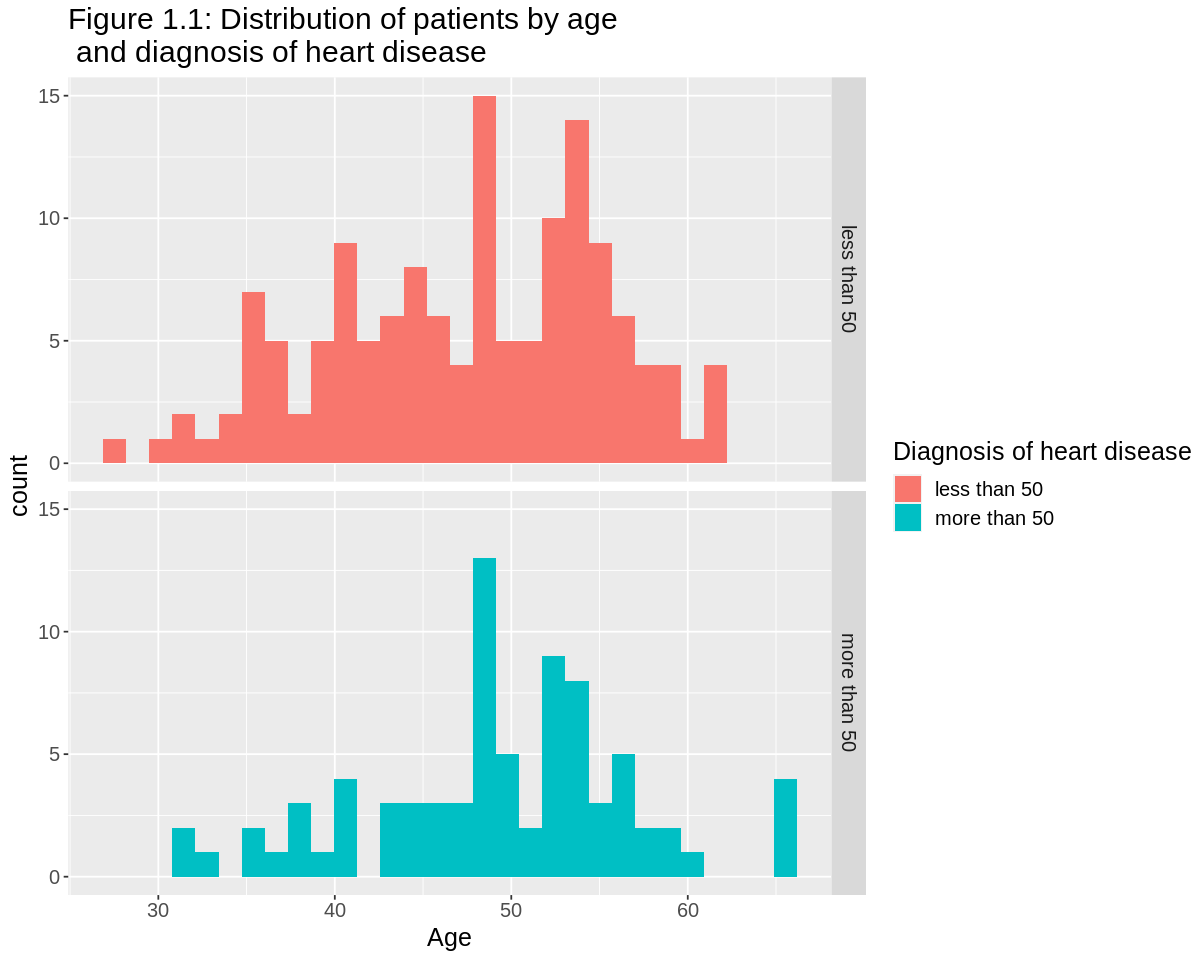

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 16 rows containing non-finite values (stat_bin).”


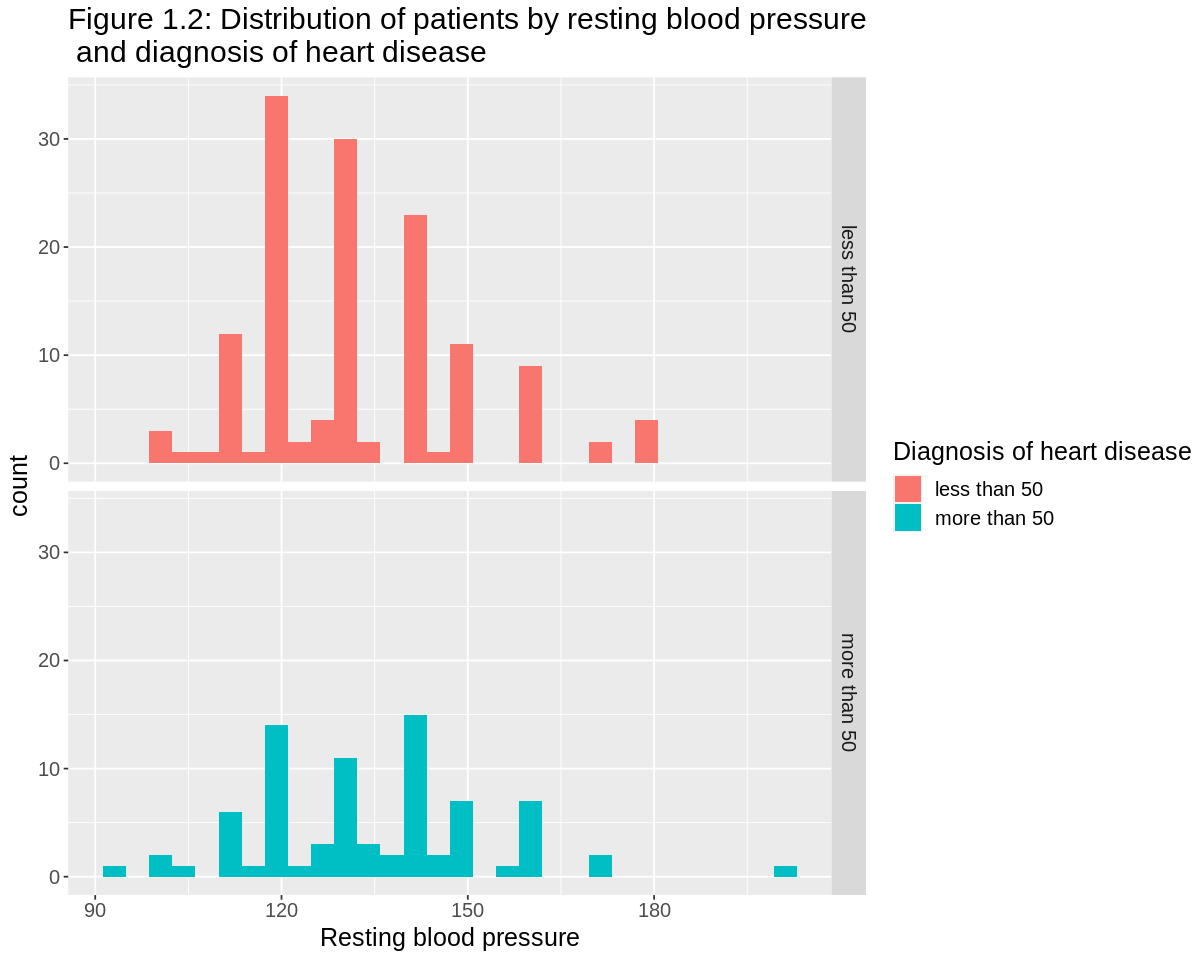

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


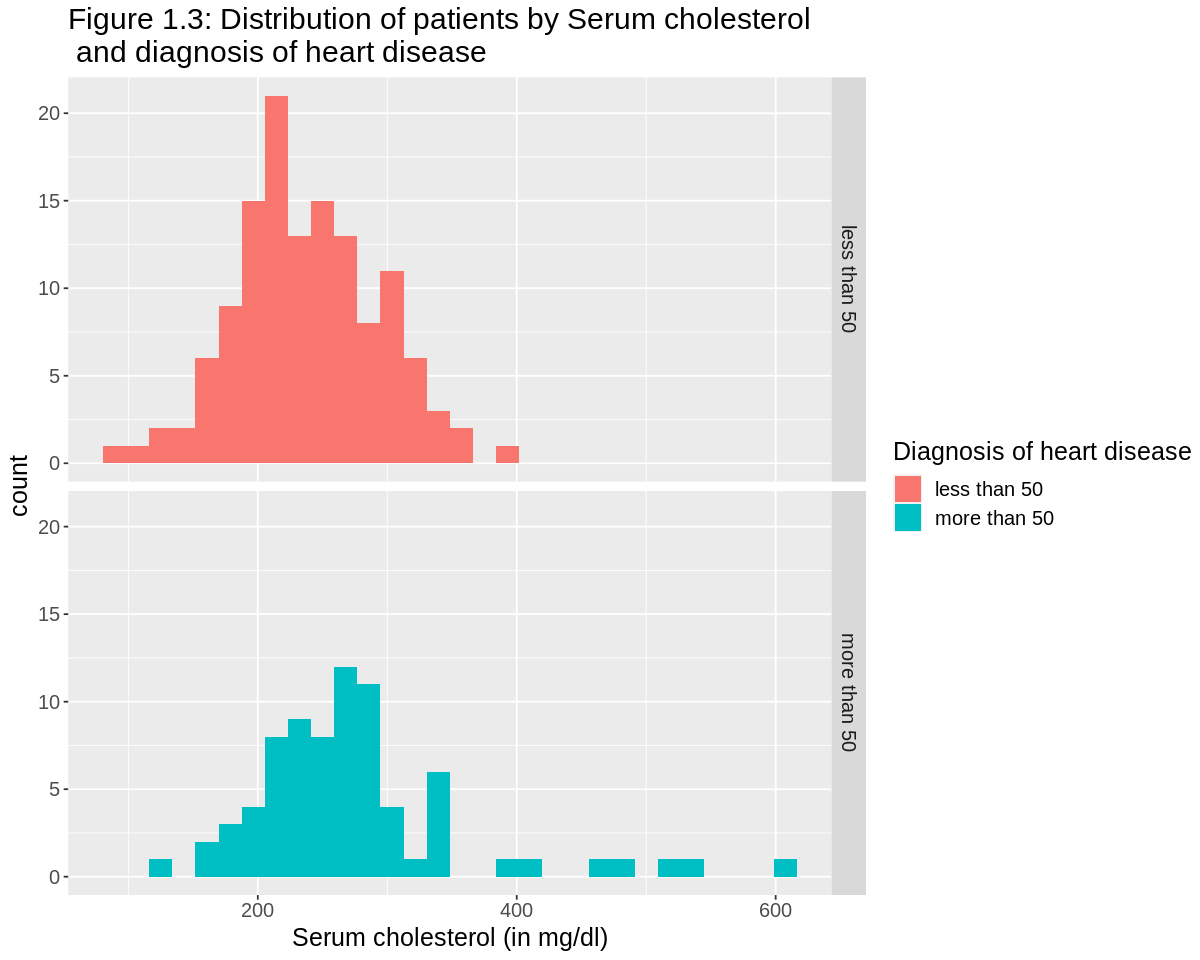

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



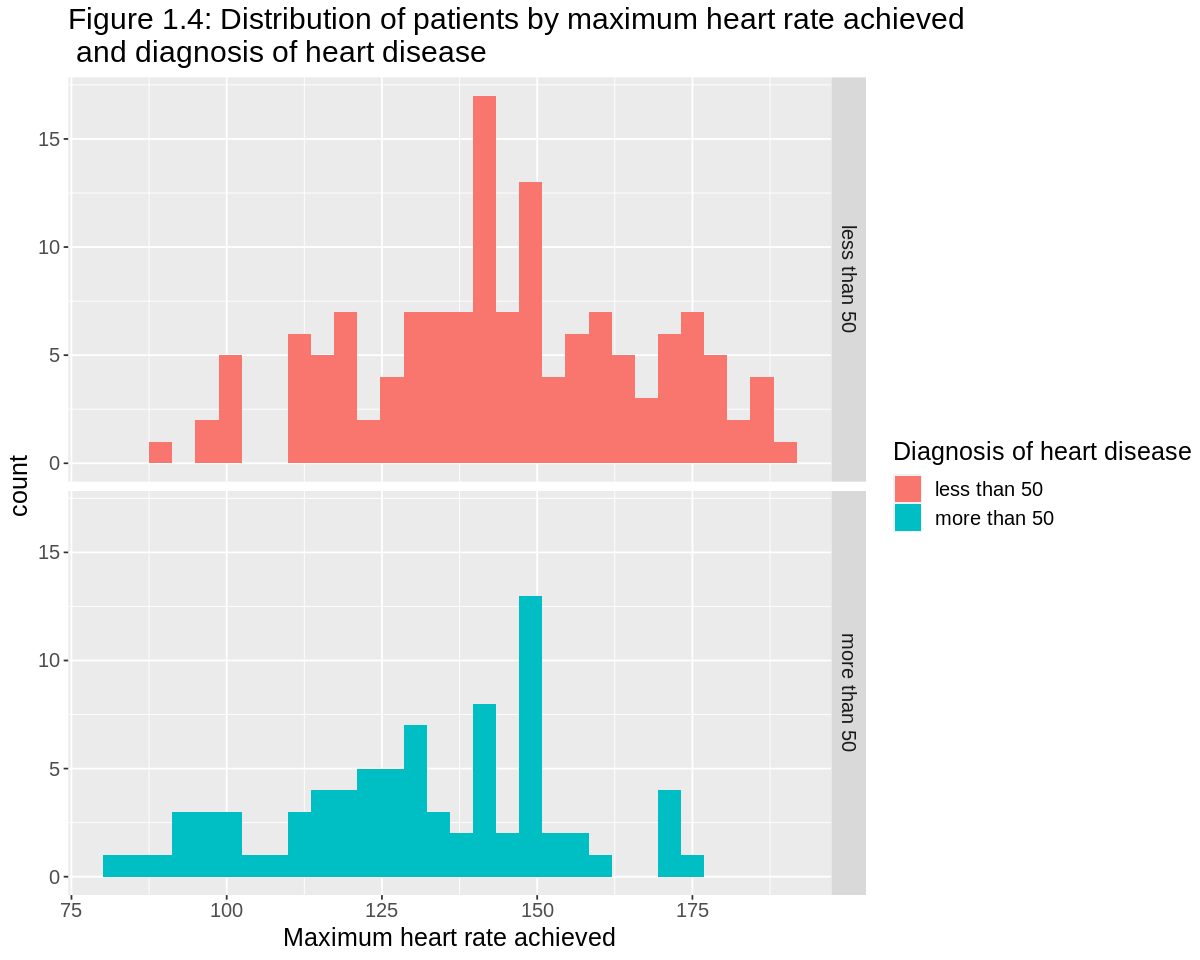

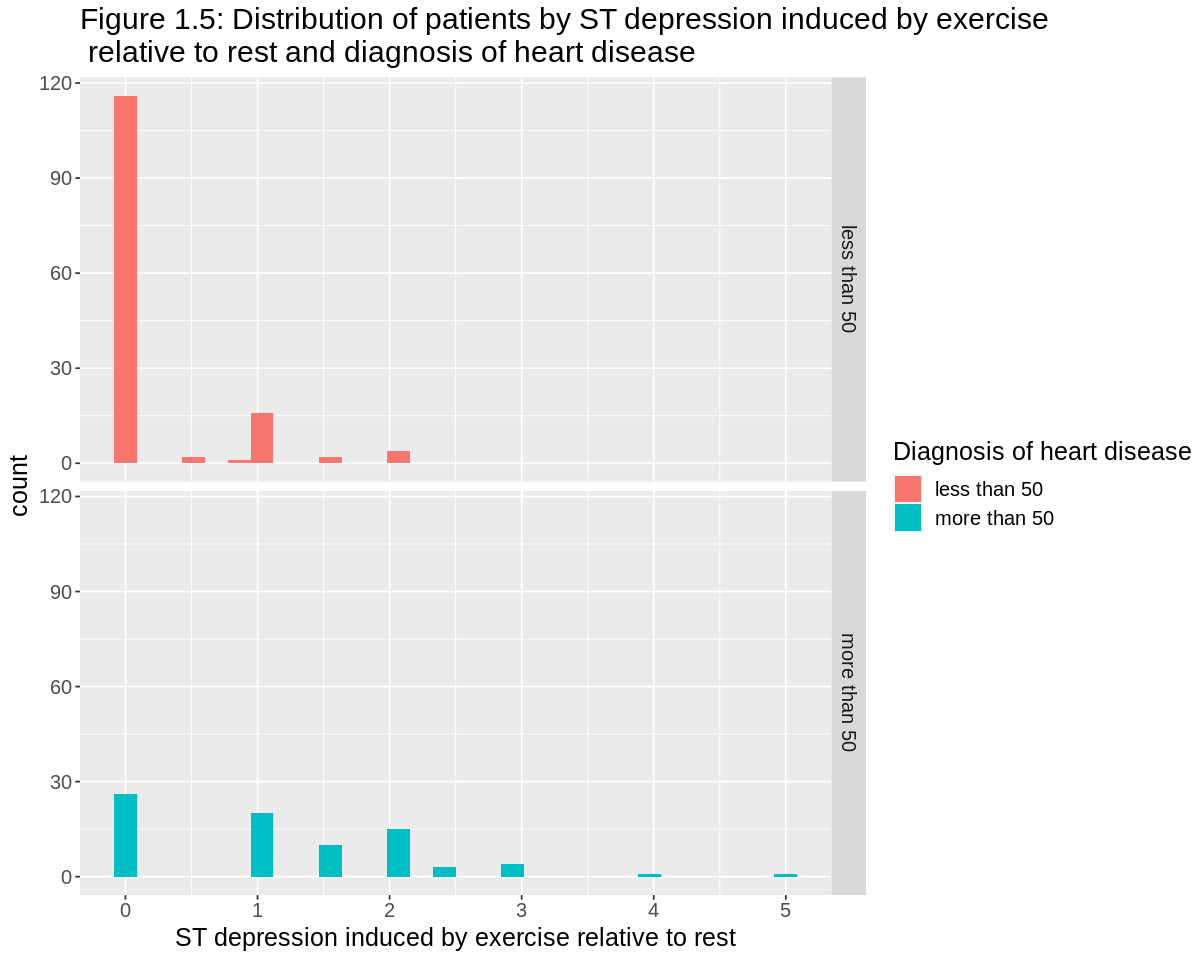

In [23]:
#Visualization
options(repr.plot.height = 8, repr.plot.width = 10)
distribution_age_plot <- training_heart_data %>%
                         select(age, num) %>%
                         ggplot(aes(x = age, fill = num)) +
                         geom_histogram(position = 'identity') +
                         labs(x = 'Age', fill = 'Diagnosis of heart disease') +
                         ggtitle('Figure 1.1: Distribution of patients by age \n and diagnosis of heart disease') +
                         facet_grid(num ~.) +
                         theme(text = element_text(size = 15))
                          
distribution_age_plot

distribution_rp_plot <- training_heart_data %>%
                         select(resting_pressure, num) %>%
                         ggplot(aes(x = resting_pressure, fill = num)) +
                         geom_histogram(position = 'identity') +
                         labs(x = 'Resting blood pressure', fill = 'Diagnosis of heart disease') +
                         ggtitle('Figure 1.2: Distribution of patients by resting blood pressure \n and diagnosis of heart disease') +
                         facet_grid(num ~.) +
                         theme(text = element_text(size = 15))
distribution_rp_plot

distribution_sc_plot <- training_heart_data %>%
                         select(serum_chol, num) %>%
                         ggplot(aes(x = serum_chol, fill = num)) +
                         geom_histogram(position = 'identity') +
                         labs(x = 'Serum cholesterol (in mg/dl)', fill = 'Diagnosis of heart disease') +
                         ggtitle('Figure 1.3: Distribution of patients by Serum cholesterol \n and diagnosis of heart disease') +
                         facet_grid(num ~.) +
                         theme(text = element_text(size = 15))
distribution_sc_plot

distribution_mhr_plot <- training_heart_data %>%
                         select(max_heartrate, num) %>%
                         ggplot(aes(x = max_heartrate, fill = num)) +
                         geom_histogram(position = 'identity') +
                         labs(x = 'Maximum heart rate achieved', fill = 'Diagnosis of heart disease') +
                         ggtitle('Figure 1.4: Distribution of patients by maximum heart rate achieved \n and diagnosis of heart disease') +
                         facet_grid(num ~.) +
                         theme(text = element_text(size = 15))
distribution_mhr_plot

distribution_op_plot <- training_heart_data %>%
                         select(oldpeak, num) %>%
                         ggplot(aes(x = oldpeak, fill = num)) +
                         geom_histogram(position = 'identity') +
                         labs(x = 'ST depression induced by exercise relative to rest', fill = 'Diagnosis of heart disease') +
                         ggtitle('Figure 1.5: Distribution of patients by ST depression induced by exercise \n relative to rest and diagnosis of heart disease') +
                         facet_grid(num ~.) +
                         theme(text = element_text(size = 15))
distribution_op_plot

**Summary on the histograms**

An obvious difference in the distribution is observed in the histograms of "ST depression induced by exercise relative to rest" and "maximum heartrate achieved". This difference may suggest that these two variables could be used to predict the presence of heart disease in a patient. In forward selection, these 2 variables also yielded the highest accuracy, therefore they will be used in the classification model.

Warning message:
“Removed 1 rows containing missing values (geom_point).”


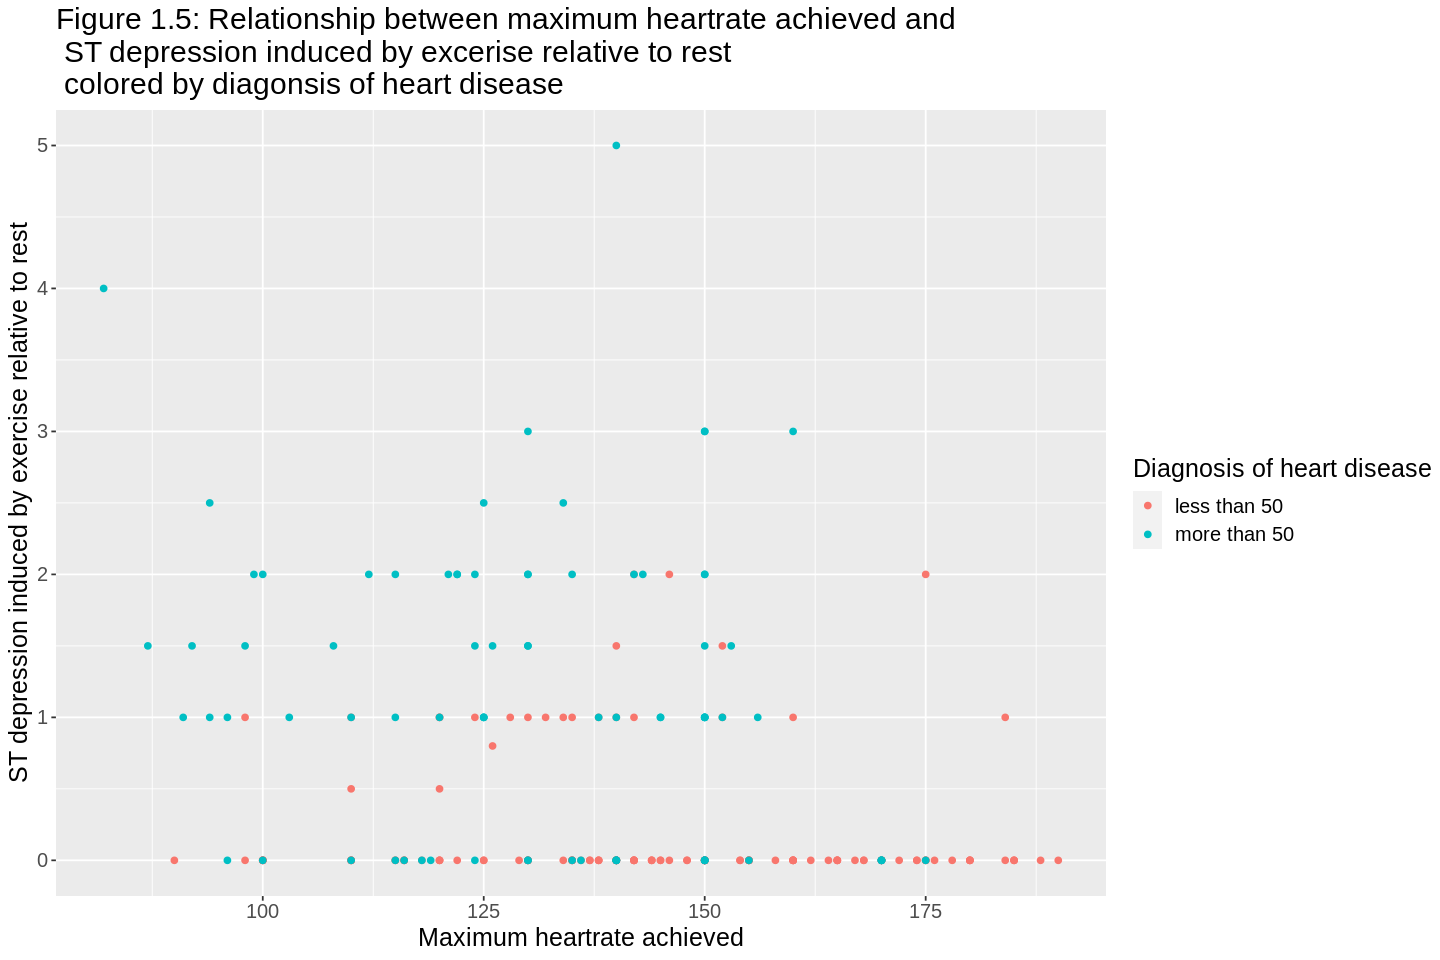

In [24]:
options(repr.plot.height = 8, repr.plot.width = 12)


max_heartrate_vs_oldpeak_plot <- training_heart_data %>%
                                 select(max_heartrate, oldpeak, num) %>%
                                 ggplot(aes(x = max_heartrate, y = oldpeak, color = num)) +
                                 geom_point() +
                                 labs(x = 'Maximum heartrate achieved', y = 'ST depression induced by exercise relative to rest', 
                                      color = 'Diagnosis of heart disease') +
                                 ggtitle('Figure 1.5: Relationship between maximum heartrate achieved and \n ST depression induced by excerise relative to rest \n colored by diagonsis of heart disease') +
                                 theme(text = element_text(size = 15))
max_heartrate_vs_oldpeak_plot

**Summary on the scatterplot**

The scatter plot above show that there is a weak correlation between maximum heartrate achieved and ST depression induced by excerise relative to rest. However, this scatter plot shows that patients without heart disease usually have relatively lower oldpeak and higher maximum heartrate, whereas patients with heart disease usually have relatively higher oldpeak and lower maximum heartrate.

In [27]:
#Classification

heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
              set_engine("kknn") %>%
              set_mode("classification")

heart_recipe <- recipe(num ~ max_heartrate + oldpeak, data = training_heart_data) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())

heart_vfold <- vfold_cv(training_heart_data, v = 5, strata = num)

heart_result <- workflow() %>%
             add_recipe(heart_recipe) %>%
             add_model(heart_spec) %>%
             tune_grid(resamples = heart_vfold, grid = 221) %>%
             collect_metrics()

accuracies <- heart_result %>%
                 filter(.metric == 'accuracy') %>%
                 arrange(desc(mean))
accuracies

x Fold2: model 1/1 (predictions): Error: Problem with `mutate()` input `.row`.
[...



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,accuracy,binary,0.7854798,4,0.02106771,Model07
8,accuracy,binary,0.7854798,4,0.02106771,Model08
11,accuracy,binary,0.7854798,4,0.01362291,Model11
⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,accuracy,binary,0.7569444,4,0.02551161,Model01
4,accuracy,binary,0.7512626,4,0.01670298,Model04
2,accuracy,binary,0.7342172,4,0.01804496,Model02


*Table 2.1: Estimated accuracy for different values of K*

In [1]:
heart_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 20)) +
                  scale_x_continuous(breaks = seq(0, 20, 2)) +
                  scale_y_continuous(limits = c(0.7, 0.85)) +
                  ggtitle('Figure 2.1: Plot of estimated accuracy versus the number of neighbors') 
heart_plot

ERROR: Error in ggplot(accuracies, aes(x = neighbors, y = mean)): could not find function "ggplot"


**Summary on the plot**

The plot above indicates that when number of neighbors K is around 6 to 11, the model is roughly optimal, and it will likely be accurate. In addition, changing the value of K doesn't decrease accuracy too much, this suggests that the choice is reliable in the presence of uncertainty.

In [29]:
# Choose K = 9

heart_spec_9 <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) %>%
              set_engine("kknn") %>%
              set_mode("classification")

heart_recipe <- recipe(num ~ max_heartrate + oldpeak, data = training_heart_data) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())


heart_fit_9 <- workflow() %>%
             add_recipe(heart_recipe) %>%
             add_model(heart_spec_9) %>%
             fit(data = training_heart_data)

heart_predict_9 <- predict(heart_fit_9, testing_heart_data) %>%
                 bind_cols(testing_heart_data) %>%
                 metrics(truth = num, estimate = .pred_class) %>%
                 filter(.metric == 'accuracy') 
heart_predict_9

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8082192


*Table 2.2: Accuracy when K = 9*

In [30]:
# Choose K = 10

heart_spec_10 <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) %>%
              set_engine("kknn") %>%
              set_mode("classification")

heart_recipe <- recipe(num ~ max_heartrate + oldpeak, data = training_heart_data) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())


heart_fit_10 <- workflow() %>%
             add_recipe(heart_recipe) %>%
             add_model(heart_spec_10) %>%
             fit(data = training_heart_data)

heart_predict_10 <- predict(heart_fit_10, testing_heart_data) %>%
                 bind_cols(testing_heart_data) %>%
                 metrics(truth = num, estimate = .pred_class) %>%
                 filter(.metric == 'accuracy') 
heart_predict_10

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8082192


*Table 2.3: Accuracy when K = 10*

In [31]:
# Choose K = 11

heart_spec_11 <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) %>%
              set_engine("kknn") %>%
              set_mode("classification")

heart_recipe <- recipe(num ~ max_heartrate + oldpeak, data = training_heart_data) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())


heart_fit_11 <- workflow() %>%
             add_recipe(heart_recipe) %>%
             add_model(heart_spec_11) %>%
             fit(data = training_heart_data)

heart_predict_11 <- predict(heart_fit_11, testing_heart_data) %>%
                 bind_cols(testing_heart_data) %>%
                 metrics(truth = num, estimate = .pred_class) %>%
                 filter(.metric == 'accuracy') 
heart_predict_11

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8082192


*Table 2.4: Accuracy when K = 11*

In [32]:
# Choose K = 12

heart_spec_12 <- nearest_neighbor(weight_func = "rectangular", neighbors = 12) %>%
              set_engine("kknn") %>%
              set_mode("classification")

heart_recipe <- recipe(num ~ max_heartrate + oldpeak, data = training_heart_data) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())

heart_fit_12 <- workflow() %>%
             add_recipe(heart_recipe) %>%
             add_model(heart_spec_12) %>%
             fit(data = training_heart_data)

heart_predict_12 <- predict(heart_fit_12, testing_heart_data) %>%
                 bind_cols(testing_heart_data) %>%
                 metrics(truth = num, estimate = .pred_class) %>%
                 filter(.metric == 'accuracy')
heart_predict_12

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8082192


*Table 2.5: Accuracy when K = 12*

In [33]:
# Choose K = 13

heart_spec_13 <- nearest_neighbor(weight_func = "rectangular", neighbors = 13) %>%
              set_engine("kknn") %>%
              set_mode("classification")

heart_recipe <- recipe(num ~ max_heartrate + oldpeak, data = training_heart_data) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())

heart_fit_13 <- workflow() %>%
             add_recipe(heart_recipe) %>%
             add_model(heart_spec_13) %>%
             fit(data = training_heart_data)

heart_predict_13 <- predict(heart_fit_13, testing_heart_data) %>%
                 bind_cols(testing_heart_data) %>%
                 metrics(truth = num, estimate = .pred_class) %>%
                 filter(.metric == 'accuracy')
heart_predict_13

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8082192


*Table 2.6: Accuracy when K = 13*

In [34]:
# Choose K = 14

heart_spec_14 <- nearest_neighbor(weight_func = "rectangular", neighbors = 14) %>%
              set_engine("kknn") %>%
              set_mode("classification")

heart_recipe <- recipe(num ~ max_heartrate + oldpeak, data = training_heart_data) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())

heart_fit_14 <- workflow() %>%
             add_recipe(heart_recipe) %>%
             add_model(heart_spec_14) %>%
             fit(data = training_heart_data)

heart_predict_14 <- predict(heart_fit_14, testing_heart_data) %>%
                 bind_cols(testing_heart_data) %>%
                 metrics(truth = num, estimate = .pred_class) %>%
                 filter(.metric == 'accuracy')
heart_predict_14

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8082192


*Table 2.7: Accuracy when K = 14*

In [35]:
# Comparing accuracies
accuracy_compare <- tibble(K = c('9', '10', '11', '12', '13', '14'),
                           Accuracy = c('80.82%', '80.82%','80.82%', '80.82%', '80.82%', '80.82%'))
accuracy_compare

K,Accuracy
<chr>,<chr>
9,80.82%
10,80.82%
11,80.82%
12,80.82%
13,80.82%
14,80.82%


*Table 2.9: Actual accuracy*

Since all the K values were shown to produce the same accuracy, K=9 will be chosen for this model as KNN classification is computationally limited as becomes slower as K gets larger. This should not however affect the estimated accuracy of this model as it is shown to be consistent in table 2.9 and figure 2.1.

Now, to test the model against an unknown observation, a new patient with a maximum heartrate achieved of 127 and an ST depression induced by exercise relative to rest of 3.4 is introduced. A diagnosis of heart disease is unanavailable, therefore this model will be used to predict the presence of one.

In [36]:
heart_spec_9 <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) %>%
            set_engine("kknn") %>%
            set_mode("classification")

heart_fit_9 <- workflow() %>%
             add_recipe(heart_recipe) %>%
             add_model(heart_spec_9) %>%
             fit(data = training_heart_data)
#heart_fit_9

new_patient <- tibble(oldpeak = 3.4, max_heartrate = 127)
new_patient

heart_test_predictions <- predict(heart_fit_9, new_patient) 
heart_test_predictions

oldpeak,max_heartrate
<dbl>,<dbl>
3.4,127


.pred_class
<fct>
more than 50


In [37]:
#Visualization of the analysis
heart_data_final <- heart_data_fct %>%
                filter(!is.na(max_heartrate))%>%
                select(num, max_heartrate, oldpeak)

heartrate_grid <- seq(min(heart_data_final$max_heartrate), 
                      max(heart_data_final$max_heartrate), 
                      length.out = 100)

oldpeak_grid <- seq(min(heart_data_final$oldpeak), 
                    max(heart_data_final$oldpeak), 
                    length.out = 100)

heartrate_oldpeak_grid <- as_tibble(expand.grid(max_heartrate = heartrate_grid, 
                                oldpeak = oldpeak_grid))


knnPredGrid <- predict(heart_fit_7, heartrate_oldpeak_grid)

prediction_table <- bind_cols(knnPredGrid, heartrate_oldpeak_grid) %>%
                    rename(num = .pred_class)

analysis_plot <- ggplot() +
                 geom_point(data = heart_data_final, 
                            mapping = aes(x = max_heartrate, y = oldpeak, color = num), 
                 alpha = 0.75) +
                 geom_point(data = prediction_table, 
                            mapping = aes(x = max_heartrate, y = oldpeak, color = num), 
                 alpha = 0.1, 
                 size = 5) +
                 labs(x = 'Maximum heartrate achieved', y = 'ST depression induced by exercise relative to rest', 
                       color = 'Diagnosis of heart disease') +
                 scale_color_manual(labels = c("less than 50", "more than 50"), 
                 values = c("orange2", "steelblue2")) +
                 ggtitle('Figure 2.2: Scatter plot of maximum heartrate achieved versus \n ST depression induced by exercise relative to rest \n where background color indicates the decision of the classifier \n when K = 8') +
                 theme(text = element_text(size = 15))
analysis_plot

ERROR: Error in predict(heart_fit_7, heartrate_oldpeak_grid): object 'heart_fit_7' not found


**Methods**

By selecting num (diagnosis of heart disease), ST depression, serum cholesterol level, and resting blood pressure, we will be conducting a K-nearest neighbors classification model to predict the existence of a diagnosis from different values of these variables. Forward selection shows that using oldpeak, serum_chol, and resting_pressure to predict num yields the highest estimated accuracy; using these predictor variables is more likely to accurately predict diagnosis of heart disease. We will split the data into training and testing sets, then complete the cross validation process to calculate the value of K with maximum validation accuracy. K will be retrained, and give a final prediction. The data will be visualized with a scatter plot with different colors to differentiate the positive/negative diagnosis', as well as a line graph to see which K is most accurate. Workflows and tibbles will be used to represent numerical data and ensure the reader follows the steps and calculations accordingly. 

**Expected outcomes and significance**

From our analysis, we expect to predict the diagnosis of heart diseases, based on ST depression, serum cholesterol level, and resting blood pressure. The impact of this analysis is that it is much easier to predict diagnosis of heart disease using data rather than conducting a measurement of the artery’s narrowing, which is a big step in accessibility of diagnoses since it would be possible to give the necessary treatment to people who may not have accessibility to other medical testing. This analysis could possibly lead to questions such as will the symptoms that indicate heart disease lead to a diagnosis of other diseases? As well, what other easier accessed measurements can be used when diagnosing heart diseases to further simplify the process.